> ## **Movie Genre Classification Task** ##

We will start by importing all of the necessary libraries for our task.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import RandomizedSearchCV

Our data was present in a text file so we will load the data from our text files.

In [2]:
# Read the data from the txt file
with open('train_data.txt', 'r', encoding='utf-8') as file1:
    data = file1.read()

In [3]:
with open('test_data.txt', 'r',encoding='utf-8') as file2:
    test_data = file2.read()

In [4]:
with open('test_data_solution.txt', 'r',encoding='utf-8') as file3:
    test_data_solutions = file3.read()

Now, in a text file the issue is that although the different rows seem seperate but the code won't be able to differentiate between the different rows. So, we will have to split the data into different rows.

In [5]:
# Split the data into individual movie entries
movie_entries_train = data.split('\n')
movie_entries_test = test_data.split('\n')
movie_entries_solutions = test_data_solutions.split('\n')

Now we will store these data rows into these arrays after processing the data so that it can be used for our task.

In [6]:
# Initialize empty lists to store extracted information
movie_ids_train = []
titles_train = []
genres_train = []
plot_summaries_train = []

In [7]:
movie_ids_test = []
titles_test = []
plot_summaries_test = []

In [8]:
movie_ids_solutions = []
titles_solutions = []
genres_solutions = []
plot_summaries_solutions = []

In [9]:
# Process each movie entry
for entry in movie_entries_train:
    if entry.strip():  # Skip empty lines
        parts = entry.split(':::')
        if len(parts) == 4:
            movie_ids_train.append(parts[0].strip())
            titles_train.append(parts[1].strip())
            genres_train.append(parts[2].strip())
            plot_summaries_train.append(parts[3].strip())


In [10]:
for entry in movie_entries_test:
    if entry.strip():  # Skip empty lines
        parts = entry.split(':::')
        if len(parts) == 3:
            movie_ids_test.append(parts[0].strip())
            titles_test.append(parts[1].strip())
            plot_summaries_test.append(parts[2].strip())


In [11]:
for entry in movie_entries_solutions:
    if entry.strip():  # Skip empty lines
        parts = entry.split(':::')
        if len(parts) == 4:
            movie_ids_solutions.append(parts[0].strip())
            titles_solutions.append(parts[1].strip())
            genres_solutions.append(parts[2].strip())
            plot_summaries_solutions.append(parts[3].strip())

Lets see how our data looks like and whether it has been correctly stored or not.

In [12]:
# Print the extracted information for the first movie entry
print("Training Data Movie ID:", movie_ids_train[0])
print("Training Data Title:", titles_train[0])
print("Training Data Genre:", genres_train[0])
print("Training Data Plot Summary:", plot_summaries_train[0])

Training Data Movie ID: 1
Training Data Title: Oscar et la dame rose (2009)
Training Data Genre: drama
Training Data Plot Summary: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


In [13]:
print("Test Data Movie ID:", movie_ids_test[0])
print("Test Data Title:", titles_test[0])
print("Test Data Plot Summary:", plot_summaries_test[0])

Test Data Movie ID: 1
Test Data Title: Edgar's Lunch (1998)
Test Data Plot Summary: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.


In [14]:
print("Solutions Data Movie ID:", movie_ids_solutions[0])
print("Solutions Data Title:", titles_solutions[0])
print("Solutions Data Genre:", genres_solutions[0])
print("Solutions Data Plot Summary:", plot_summaries_solutions[0])

Solutions Data Movie ID: 1
Solutions Data Title: Edgar's Lunch (1998)
Solutions Data Genre: thriller
Solutions Data Plot Summary: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.


Afterwards I combined the different elements of similar data and stored them into a singular tuple.

In [15]:
# Create a list of tuples containing the extracted information
movie_data_train = list(zip(movie_ids_train, titles_train, genres_train, plot_summaries_train))

In [16]:
movie_data_test = list(zip(movie_ids_test, titles_test, plot_summaries_test))

In [17]:
movie_data_solutions = list(zip(movie_ids_solutions, titles_solutions, genres_solutions, plot_summaries_solutions))

Now, usually, I find it relatively convinient to work with data that is in the csv file format. So I will shift my data into three seperate csv files. One for the training data, one for the test data and last for the solutions data.

In [18]:
# Define the CSV file name
csv_file_train = 'movie_data_train.csv'
csv_file_test = 'movie_data_test.csv'
csv_file_solution = 'movie_data_solution.csv'

In [19]:
# Write the data to the CSV file
with open(csv_file_train, 'w', newline='', encoding='utf-8') as file1:
    writer = csv.writer(file1)
    writer.writerow(["Movie ID", "Title", "Genre", "Plot Summary"])  # Write header
    writer.writerows(movie_data_train)  # Write the data rows

In [20]:
# Write the data to the CSV file
with open(csv_file_test, 'w', newline='', encoding='utf-8') as file2:
    writer = csv.writer(file2)
    writer.writerow(["Movie ID", "Title", "Plot Summary"])  # Write header
    writer.writerows(movie_data_test)  # Write the data rows

In [21]:
# Write the data to the CSV file
with open(csv_file_solution, 'w', newline='', encoding='utf-8') as file3:
    writer = csv.writer(file3)
    writer.writerow(["Movie ID", "Title", "Genre", "Plot Summary"])  # Write header
    writer.writerows(movie_data_solutions)  # Write the data rows

Now we will load the data into a pandas dataframe and assign the data to our variables.

In [22]:
# Load training data
train_data = pd.read_csv("movie_data_train.csv")
test_data = pd.read_csv("movie_data_test.csv")
solution_data = pd.read_csv("movie_data_solution.csv")

Ok. Now the data is ready for cleaning. So, we will start by removing the unnecessary columns from our data.

In [23]:
train_data['Plot Summary'].isna().sum() 

0

In [24]:
train_data.dropna(subset=['Plot Summary'], inplace=True)

In [25]:
train_data['Plot Summary'].duplicated().sum()

128

In [26]:
train_data.drop_duplicates(inplace=True)

There were no null values but duplicated values were present so we removed them directly from our data. Now, lets visualise our data and see the distribution of our data based upon the different genres.


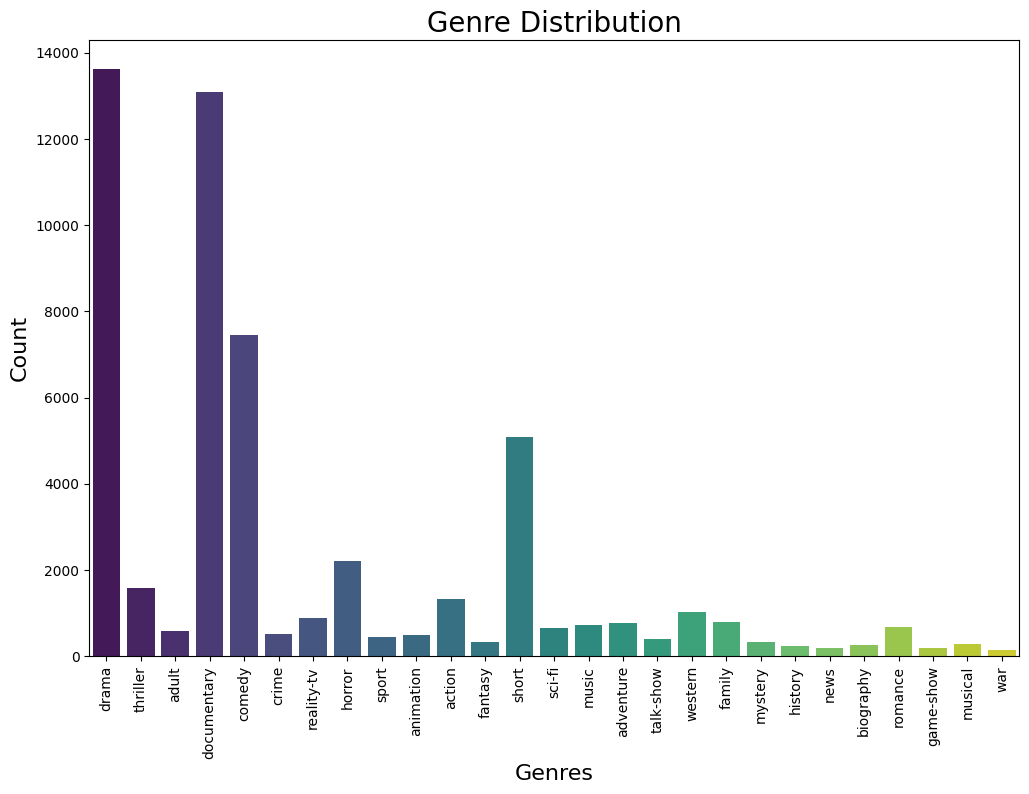

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Genre', data= train_data, palette = 'viridis')
plt.title('Genre Distribution', fontsize=20)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()


After loading the data, we would now move onto preprocessing the data. We will lemmitize the data and tokenize the data. We can also remove the stop words from our data but I found that it was computationally expensive and extremely time-consuming which was not convinient for our task.

In [28]:
# Preprocess the text data
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]
    return ' '.join(tokens)

In [29]:
X_train = train_data['Plot Summary'].apply(preprocess_text)
y_train = train_data['Genre']
X_test = test_data['Plot Summary'].apply(preprocess_text)
y_test = solution_data['Genre']

Our objective are the genres so we will use a label encoder to encode the genres into numerical values. This will help us in training our model. 

In [30]:
# Encode genres using label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

A common method is for us to store the necessary features into vectors using the TF-IDF vectorizer. The feature vectors are stored in a sparse matrix. We will use the TF-IDF vectorizer to convert our data into feature vectors.

In [31]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


> ## **Model:** Naive Bayes ##

We will now train our Naive Bayes model and test it on our data. We are going to take a range of values of alpha and use the GridSearchCV to search for the best value of alpha, so that we can obtain best results. More values can be tested but they will take more time due to the data being large. 

In [32]:
# Define hyperparameters to tune for Naive Bayes
param_grid_nb = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}


In [33]:
# Create a grid search with cross-validation for Naive Bayes
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, verbose=1)

In [34]:
# Perform grid search on the training data for Naive Bayes
grid_search_nb.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]}, verbose=1)

In [35]:
# Get the best hyperparameters and the corresponding model for Naive Bayes
best_nb = grid_search_nb.best_estimator_

In [36]:
# Predict on the test data using the best Naive Bayes model
y_pred_nb = best_nb.predict(X_test_tfidf)

In [37]:
# Evaluate the best Naive Bayes model on the test data
print("Best Naive Bayes Performance on Test Data:")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_, zero_division = 0))

Best Naive Bayes Performance on Test Data:
              precision    recall  f1-score   support

      action       0.51      0.17      0.25      1314
       adult       0.52      0.18      0.27       590
   adventure       0.63      0.10      0.17       775
   animation       0.61      0.02      0.04       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.43      0.47      7446
       crime       0.18      0.00      0.01       505
 documentary       0.59      0.87      0.70     13096
       drama       0.47      0.81      0.60     13612
      family       0.70      0.03      0.05       783
     fantasy       0.45      0.03      0.06       322
   game-show       0.92      0.52      0.67       193
     history       0.00      0.00      0.00       243
      horror       0.70      0.38      0.50      2204
       music       0.64      0.46      0.54       731
     musical       0.00      0.00      0.00       276
     mystery       1.00      0.00     

Based upon our evaluation of the Naives Bayes Model, the best value of alpha for us would just have an accuracy of 0.54 which is not good enough for our task. So, we will try to use a different model for our task. We will now test the **Logistic** Regression Model.

> ## **Model:** Logistic Regression ##

After Naive Bayes, we will now test the Logistic Regression Model. We will use the GridSearchCV to search for the best value of C, so that we can obtain best results. More values can be tested but they will take more time due to the data being large.

In [38]:
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1],
    'max_iter': [100, 500, 1000, 5000],
    'solver': ['liblinear'],  # Use 'liblinear' solver
    'penalty': ['l2']  # Use L2 regularization
}


In [39]:
# Create a grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5, verbose=1)

In [40]:
# Perform grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 500, 1000, 5000], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             verbose=1)

In [41]:
# Get the best hyperparameters and the corresponding model
best_logreg = grid_search.best_estimator_

In [42]:
# Predict on the test data using the best model
y_pred_logreg = best_logreg.predict(X_test_tfidf)


In [43]:
# Evaluate the best Logistic Regression model on the test data
print("Best Logistic Regression Performance on Test Data:")
print(classification_report(y_test, y_pred_logreg, target_names=label_encoder.classes_, zero_division=0))

Best Logistic Regression Performance on Test Data:
              precision    recall  f1-score   support

      action       0.49      0.26      0.34      1314
       adult       0.63      0.22      0.32       590
   adventure       0.67      0.16      0.25       775
   animation       0.55      0.05      0.10       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.58      0.56      7446
       crime       0.43      0.02      0.05       505
 documentary       0.66      0.87      0.75     13096
       drama       0.54      0.78      0.64     13612
      family       0.53      0.07      0.12       783
     fantasy       0.59      0.03      0.06       322
   game-show       0.85      0.52      0.65       193
     history       0.00      0.00      0.00       243
      horror       0.66      0.56      0.61      2204
       music       0.67      0.44      0.53       731
     musical       0.12      0.01      0.01       276
     mystery       0.40      0

As a thorough analysis of the data is both time consuming and computationally expensive so unfortunately I could not do it. But I have tried to do some analysis on the data and have acheived an accuracy of almost 60%. Although not desirable but it is a good start. This can be improved by overcoming hardware limitations and by using more advanced techniques. Other algorithms were also tested on our data but none were able to complete their running cycles within convinient time frames so they were discarded. 